In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

655

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2c591c031d448c1a02bbc18f3bf8fa57


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | leshukonskoye
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | margate
Processing Record 4 of Set 1 | san cristobal
Processing Record 5 of Set 1 | falealupo
City not found. Skipping...
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | platanos
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | minab
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | rosarito
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 1 | pedernales
Processing Record 23 o

Processing Record 38 of Set 4 | fairview
Processing Record 39 of Set 4 | merauke
Processing Record 40 of Set 4 | tarakan
Processing Record 41 of Set 4 | seminole
Processing Record 42 of Set 4 | hokitika
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | gamba
Processing Record 45 of Set 4 | guilin
Processing Record 46 of Set 4 | taicheng
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | xining
Processing Record 50 of Set 4 | lorengau
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | altay
Processing Record 4 of Set 5 | svetlogorsk
Processing Record 5 of Set 5 | boyolangu
Processing Record 6 of Set 5 | curaca
Processing Record 7 of Set 5 | torbay
Processing Record 8 of Set 5 | kangaatsiaq
Processing Record 9 of Set 5 | codrington
Processing Record 10 of Set 5 | nelson bay
Processing Record 11 of Set 5 

Processing Record 30 of Set 8 | nabire
Processing Record 31 of Set 8 | vila
Processing Record 32 of Set 8 | balabac
Processing Record 33 of Set 8 | jining
Processing Record 34 of Set 8 | sfantu gheorghe
Processing Record 35 of Set 8 | namatanai
Processing Record 36 of Set 8 | mareeba
Processing Record 37 of Set 8 | roald
Processing Record 38 of Set 8 | steinbach
Processing Record 39 of Set 8 | bababe
City not found. Skipping...
Processing Record 40 of Set 8 | strezhevoy
Processing Record 41 of Set 8 | tual
Processing Record 42 of Set 8 | winnemucca
Processing Record 43 of Set 8 | nantucket
Processing Record 44 of Set 8 | kruisfontein
Processing Record 45 of Set 8 | artyk
City not found. Skipping...
Processing Record 46 of Set 8 | kysyl-syr
Processing Record 47 of Set 8 | wellsford
Processing Record 48 of Set 8 | novoblagodarnoye
Processing Record 49 of Set 8 | newport
Processing Record 50 of Set 8 | berekua
Processing Record 1 of Set 9 | samagaltay
Processing Record 2 of Set 9 | ambon


Processing Record 19 of Set 12 | klyuchi
Processing Record 20 of Set 12 | cintalapa
Processing Record 21 of Set 12 | cenade
Processing Record 22 of Set 12 | teahupoo
Processing Record 23 of Set 12 | beidao
Processing Record 24 of Set 12 | cap malheureux
Processing Record 25 of Set 12 | angra
City not found. Skipping...
Processing Record 26 of Set 12 | oshawa
Processing Record 27 of Set 12 | mehamn
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | cam pha
City not found. Skipping...
Processing Record 30 of Set 12 | horki
Processing Record 31 of Set 12 | nancha
Processing Record 32 of Set 12 | ocampo
Processing Record 33 of Set 12 | wuan
Processing Record 34 of Set 12 | pozo colorado
Processing Record 35 of Set 12 | port-gentil
Processing Record 36 of Set 12 | henties bay
Processing Record 37 of Set 12 | pecos
Processing Record 38 of Set 12 | khonuu
City not found. Skipping...
Processing Record 39 of Set 12 | natal
Processing Record 40 of Set 12 | mobaye
Process

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leshukonskoye,64.8989,45.7622,29.03,90,94,9.48,RU,2021-04-04 23:51:33
1,Vaini,-21.2000,-175.2000,80.60,74,20,14.97,TO,2021-04-04 23:51:33
2,Margate,51.3813,1.3862,46.99,70,20,4.00,GB,2021-04-04 23:51:34
3,San Cristobal,7.7669,-72.2250,80.60,74,40,4.61,VE,2021-04-04 23:51:34
4,Guerrero Negro,27.9769,-114.0611,65.71,66,2,18.81,MX,2021-04-04 23:51:35
5,Chokurdakh,70.6333,147.9167,-12.32,93,43,4.14,RU,2021-04-04 23:51:35
6,East London,-33.0153,27.9116,67.26,71,16,13.20,ZA,2021-04-04 23:49:48
7,Aklavik,68.2191,-135.0107,19.40,68,100,8.05,CA,2021-04-04 23:51:36
8,Kaitangata,-46.2817,169.8464,57.00,67,53,18.99,NZ,2021-04-04 23:51:36
9,Busselton,-33.6500,115.3333,67.59,81,13,3.71,AU,2021-04-04 23:51:37


In [12]:
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leshukonskoye,RU,2021-04-04 23:51:33,64.8989,45.7622,29.03,90,94,9.48
1,Vaini,TO,2021-04-04 23:51:33,-21.2000,-175.2000,80.60,74,20,14.97
2,Margate,GB,2021-04-04 23:51:34,51.3813,1.3862,46.99,70,20,4.00
3,San Cristobal,VE,2021-04-04 23:51:34,7.7669,-72.2250,80.60,74,40,4.61
4,Guerrero Negro,MX,2021-04-04 23:51:35,27.9769,-114.0611,65.71,66,2,18.81
5,Chokurdakh,RU,2021-04-04 23:51:35,70.6333,147.9167,-12.32,93,43,4.14
6,East London,ZA,2021-04-04 23:49:48,-33.0153,27.9116,67.26,71,16,13.20
7,Aklavik,CA,2021-04-04 23:51:36,68.2191,-135.0107,19.40,68,100,8.05
8,Kaitangata,NZ,2021-04-04 23:51:36,-46.2817,169.8464,57.00,67,53,18.99
9,Busselton,AU,2021-04-04 23:51:37,-33.6500,115.3333,67.59,81,13,3.71


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

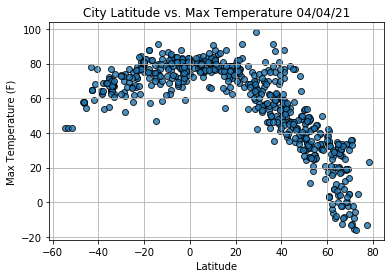

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

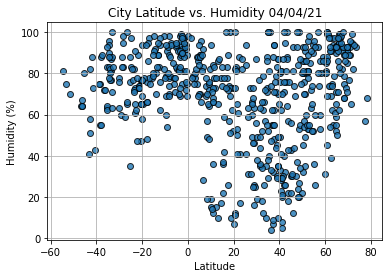

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

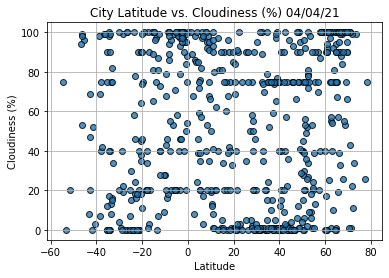

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

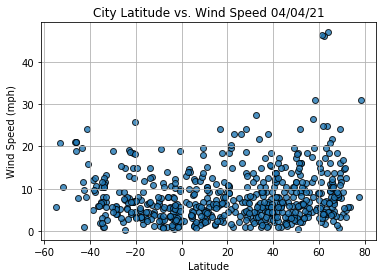

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()